# Projektas

## Aprašymas

Sukurkite projektą su Python, kuriame išanalizuotumėte pasirinktą duomenų rinkinį. 

Duomenis galite pasiimti iš bet kur ir bet kokius. Pavyzdžiui, iš Lietuvos atvirų duomenų, ar kitų 
pasaulio šalių.

Būtų labai gerai jei jūsų gautuose duomenyse būtų bent 2 tūkst. eilučių, tačiau jeigu duomenys nėra tvarkingi ir reikės daug laiko suinvestuoti į jų susitvarkymą, įrašų gali būti ir mažiau. Duomenys gali būti tiek iš failo (json, csv, ...), tiek iš duomenų bazės, galima naudoti kombinaciją iš kelių failų, gali viskas būti iš vieno. 

Projekto žingniai: 
- Duomenų užsikėlimas (CSV, JSON, XLSX, t.t) 
- Duomenų validacija (tikriname ar yra null eilučių, netinkamų verčių, t.t, dublikatų šalinimas) 
- Duomenų keitimas (keičiame neteisingu duomenis, užpildome vidurkiais ar jūsų pasirinktomis vertėmis)
- Duomenų sumarizacija (kas įdomaus duomenyse, minimalios vertės, maksimalios vertės, kiti svarbūs aspektai) 

Verslo/research klausimai - išsikelkite 4-5 verslo/research klausimus ir atsakykite juos analize/vizualizacijomis (klausimų pvz): 
- Koks vidutinis atlyginimas pagal darbuotojų profesijas? 
- Kaip keitėsi sergamumas per paskutinius 12 mėn. Tarp skirtingų amžiaus grupių? 
- Kokie filmai buvo žiūrimiausi tarp moterų ir vyrų grupių? (top 5 filmai)
- Kokia yra bakteriju kolonijos raida (dienomis)?

Projekto aptarimas:
- Su kokiomis problemomis susidūrėte analizuodami duomenis? 
- Kodėl pasirinkote šiuos duomenis?  
- Jeigu projektą vykdytumėte antrą kart – ką darytumėte kitaip? Ar liktumėte prie tų pačių  
duomenų, o galbūt pasirinktumėte kitą dataset – jei taip, kodėl? 

Pabaigę projektą, įkelkite jupyter notebook'ą į egzamino potemę google classroom'e.

## Projekto įgyvendinimas

Projekto tikslas : išanalizuoti Michelin restoranų duomenis, siekiant suprasti:
- Kuriose šalyse yra daugiausia Michelin restoranų?
- Kokiose kainų kategorijose dažniausiai randami Michelin restoranai?
- Ar Michelin žvaigždutės priklauso nuo kainos lygio?
- Kokios virtuvės rūšys yra populiariausios Michelin restoranuose?
- Kiek restoranų turi „Green Star“ ekologiškumo įvertinimą ir ar jie dažniau gauna žvaigždes?

Duomenys: (https://www.kaggle.com/datasets/ngshiheng/michelin-guide-restaurants-2021)

In [2]:
import pandas as pd  

file_path = "michelin_my_maps.csv"

df = pd.read_csv(file_path)

df = df.drop(columns=["WebsiteUrl", "PhoneNumber", "Url"]) #nereikalingi stulpeliai

print(df.isnull().sum())  


Name                       0
Address                    0
Location                   0
Price                      1
Cuisine                    0
Longitude                  0
Latitude                   0
Award                      0
GreenStar                  0
FacilitiesAndServices    922
Description                0
dtype: int64


In [3]:
df["FacilitiesAndServices"] = df["FacilitiesAndServices"].fillna("Nepateikta") 
df["Price"] = df["Price"].fillna("N/A") 

print(df.isnull().sum())


Name                     0
Address                  0
Location                 0
Price                    0
Cuisine                  0
Longitude                0
Latitude                 0
Award                    0
GreenStar                0
FacilitiesAndServices    0
Description              0
dtype: int64


In [4]:
print(df.shape)  


(17737, 11)


In [5]:
df.columns


Index(['Name', 'Address', 'Location', 'Price', 'Cuisine', 'Longitude',
       'Latitude', 'Award', 'GreenStar', 'FacilitiesAndServices',
       'Description'],
      dtype='object')

1. Kokiose šalyse yra daugiausia Michelin restoranų? Šis klausimas parodo, kurios rinkos labiausiai vertina aukštąją virtuvę.

In [6]:
country_counts = df["Location"].value_counts().reset_index() #naujas dataFrame

country_counts.columns = ["Country", "Restaurant Count"]

country_counts


,Country,Restaurant Count
0,"Tokyo, Japan",504
1,"Paris, France",459
2,"London, United Kingdom",368
3,Singapore,288
4,"Kyoto, Japan",257
...,...,...
5795,"Southbourne, United Kingdom",1
5796,"Hay-on-Wye, United Kingdom",1
5797,"Tarcal, Hungary",1
5798,"Malahide, Ireland",1


Kodėl Japonija turi daugiausia Michelin restoranų?
- Kulinarinė kultūra – Japonijoje vyrauja aukščiausio lygio gastronomija: kaiseki, sushi, ramen, wagyu jautiena.
- Michelin gido strategija – Michelin aktyviai investuoja į Japoniją nuo 2007 m., vertina ne tik prabangius, bet ir paprastus, meistriškus restoranus.
- Didelė konkurencija – Tokijuje daugiau nei 160,000 restoranų, todėl tik išskirtinė kokybė leidžia išlikti rinkoje.
- Meistriškumas ir preciziškumas – Japonų restoranai dažnai specializuojasi vienoje srityje ir siekia tobulumo.

Paryžius (Prancūzija) – gastronomijos sostinė
- Istorinė kulinarijos reikšmė – prancūzų virtuvė yra aukštosios gastronomijos (haute cuisine) lopšys.
- Michelin gido kilmė – Paryžius buvo viena pirmųjų vertinamų vietų (nuo 1926 m.).
- Prabangūs restoranai – dauguma Paryžiaus Michelin restoranų yra klasikiniai, elegantiški, su rafinuotu meniu.

Londonas (JK) – moderni įvairovė
- Daug kultūrų – Londone Michelin restoranai apima įvairias virtuves (indų, kinų, japonų, italų).
- Eksperimentinė virtuvė – daugiau inovatyvių ir „fusion“ restoranų nei Paryžiuje ar Tokijuje.
- Stipri rinka, bet mažiau tradicijų – JK neturi tokios gilios gastronominės istorijos kaip Prancūzija ar Japonija.

2. Kokie yra populiariausi Michelin restoranų kainų lygiai? Panagrinėkime ar dauguma restoranų yra prieinami vidutiniams vartotojams, ar orientuoti į aukščiausios klasės klientus.

In [44]:

price_counts = df["Price"].value_counts().reset_index()

price_counts.columns = ["Price Level", "Restaurant Count"]

price_counts




,Price Level,Restaurant Count
0,Medium,5861
1,High,4276
2,Luxury,2845


Michelin restoranai nėra tik prabangos vietos.

Dauguma restoranų yra vidutinės kainos (Medium) kategorijoje, kas reiškia, kad paprastas vartotojas gali sau leisti apsilankyti bent kartais.
Michelin gidas vertina ne tik kainą, bet ir kokybę, autentiškumą bei meistriškumą, todėl net paprasti užkandinės stiliaus restoranai gali patekti į sąrašą (pvz., Japonijoje ramen vietos).
Vis dėlto „Luxury“ kategorija išlieka svarbi.

Tokie restoranai skirti aukštos klasės gurmanams, ypatingoms progoms ir verslo klientams.
Jie formuoja Michelin prestižą, nes tradicinė prabanga ir aptarnavimas yra svarbi gido dalis.

3. Ar Michelin žvaigždutės priklauso nuo kainos lygio? Tai parodo, ar brangesni restoranai dažniau gauna Michelin įvertinimus, ar kaina nelemia kokybės.

In [ ]:
stars_vs_price = df.groupby("Price")["Award"].value_counts()

stars_vs_price = stars_vs_price.unstack(fill_value=0) #atskiri stulpeliai kiekvienam michelin įvertinimui

stars_vs_price



Award,1 Star,2 Stars,3 Stars,Bib Gourmand,Selected Restaurants
Price,,,,,
High,823,14,2,54,3383
Luxury,1474,369,113,1,888
Medium,67,1,0,1843,3950


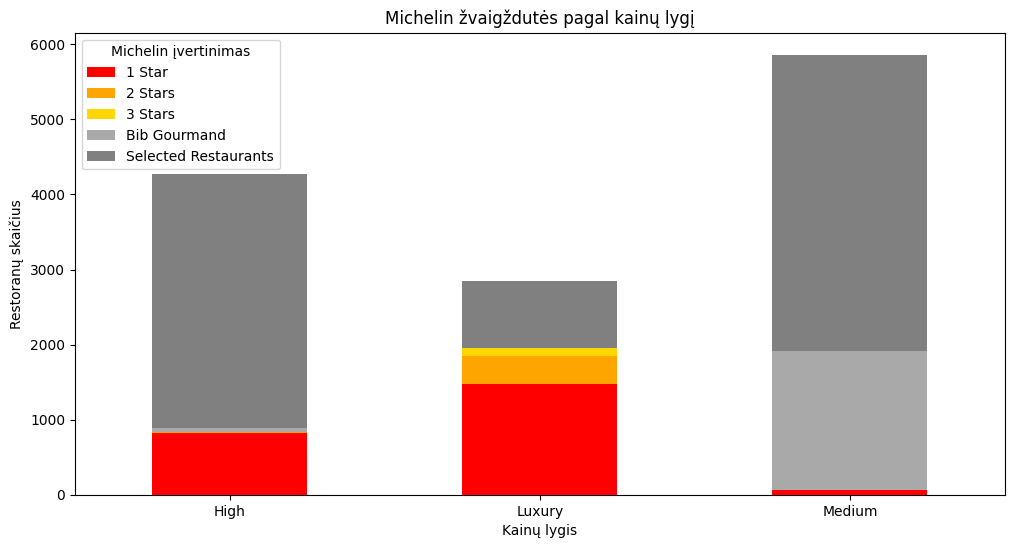

In [50]:
import matplotlib.pyplot as plt

stars_vs_price.plot(kind="bar", stacked=True, figsize=(12,6), color=["red", "orange", "gold", "darkgray", "gray"])

plt.xlabel("Kainų lygis")
plt.ylabel("Restoranų skaičius")
plt.title("Michelin žvaigždutės pagal kainų lygį")
plt.legend(title="Michelin įvertinimas")
plt.xticks(rotation=0)  

plt.show()



- Luxury restoranai turi daugiausia 3 žvaigždučių įvertinimų.
- High restoranai dominuoja tarp 1 žvaigždutės restoranų.
- Medium restoranai daugiausia gauna „Bib Gourmand“ arba „Selected Restaurants“.
- Kaina didina šansus gauti Michelin žvaigždutę, bet negarantuoja jos.

- Bib Gourmand – Michelin įvertinimas, skirtas restoranams, kurie siūlo puikų kainos ir kokybės santykį. Tai nėra žvaigždutė, bet rodo, kad restoranas vertas dėmesio dėl skanaus maisto už prieinamą kainą.

- Selected Restaurants – restoranai, kurie nėra gavę žvaigždutės ar „Bib Gourmand“, bet vis tiek yra Michelin rekomenduojami, nes atitinka aukštus kokybės standartus.

4. Kokia yra populiariausia virtuvės rūšis Michelin restoranuose? Kurios pasaulio virtuvės yra labiausiai vertinamos Michelin gide ir kokias tendencijas galima prognozuoti ateityje.

In [ ]:
cuisine_counts = df["Cuisine"].value_counts()

cuisine_counts = cuisine_counts.reset_index() 

cuisine_counts.columns = ["Cuisine Type", "Restaurant Count"]

cuisine_counts.head(10)



,Cuisine Type,Restaurant Count
0,Modern Cuisine,2449
1,Traditional Cuisine,653
2,Creative,575
3,Contemporary,437
4,Seafood,268
5,Italian,240
6,Classic Cuisine,210
7,Farm to table,193
8,Mediterranean Cuisine,183
9,Modern French,171


- Modern Cuisine yra dominuojanti kategorija – tai reiškia, kad Michelin vertina inovacijas ir modernias interpretacijas labiau nei tradicinius patiekalus.
- Traditional Cuisine vis dar svarbi, bet mažiau populiari nei moderni virtuvė.
- Creative ir Contemporary rodo, kad Michelin mėgsta restoranus, kurie eksperimentuoja su skoniais ir tekstūromis.
- Seafood virtuvė yra reikšminga, tačiau ji nėra tokia populiari kaip modernūs ar kūrybiški restoranai.

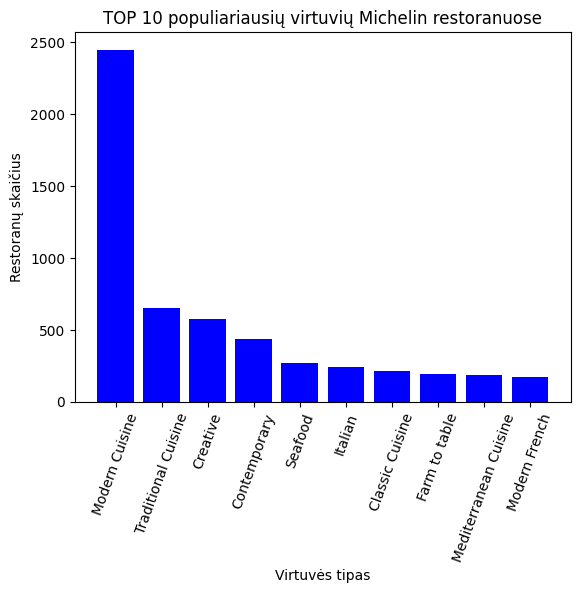

In [48]:
top_cuisines = cuisine_counts.head(10)

plt.bar(top_cuisines["Cuisine Type"], top_cuisines["Restaurant Count"], color="blue")

plt.xlabel("Virtuvės tipas")
plt.ylabel("Restoranų skaičius")
plt.title("TOP 10 populiariausių virtuvių Michelin restoranuose")
plt.xticks(rotation=70)
plt.show()



5. Kiek Michelin restoranų turi „Green Star“ (ekologiškumas)? Ar ekologiški restoranai dažniau gauna žvaigždes?

In [38]:

green_star_counts = df["GreenStar"].value_counts().reset_index()

green_star_counts.columns = ["Green Star", "Restaurant Count"]

green_star_counts


,Green Star,Restaurant Count
0,0,12463
1,1,519


In [52]:
green_star_vs_award = df.groupby("GreenStar")["Award"].value_counts().unstack(fill_value=0)

green_star_vs_award = green_star_vs_award.reset_index()

green_star_vs_award


Award,GreenStar,1 Star,2 Stars,3 Stars,Bib Gourmand,Selected Restaurants
0,0,2144,335,86,1836,8062
1,1,220,49,29,62,159


Ne ekologiški restoranai dažniau patenka į „Bib Gourmand“ ir „Selected Restaurants“ kategorijas.
- Ekologiški restoranai dažniau pasiekia aukščiausius Michelin įvertinimus (2 ir 3 žvaigždes).
- Tvarumas tampa svarbus Michelin vertinime, bet dar nėra plačiai paplitęs.
- Ekologiškumas gali padėti išsiskirti rinkoje ir padidinti šansus gauti Michelin įvertinimą.

IŠVADOS: 
- Michelin gidas vertina ne tik prabangą, bet ir kokybę, inovacijas bei ekologiškumą.
- Brangūs restoranai dažniau gauna aukštesnius įvertinimus, tačiau vidutinės kainos restoranai taip pat gali patekti į Michelin gido rekomendacijas.
- Modernios ir kūrybinės virtuvės dominuoja Michelin restoranuose.
- Ekologiški restoranai dažniau gauna aukščiausius įvertinimus, todėl tvarumas tampa svarbiu kriterijumi.